#  Mental Health Diagnosis & Treatment Outcomes Analysis Using SQL (PostgreSQL + Python)


## Project Objective

The goal of this project is to analyze patient-level mental health data using SQL and Python.  
We aim to uncover:

- Most common mental health diagnoses
- Effectiveness of various therapies
- Patterns in stress levels and treatment adherence
- Relationship between AI-detected mood and treatment outcomes
- Duration of treatment across different diagnoses

This project demonstrates skills in:
- SQL query writing (GROUP BY, CASE, aggregation, date operations)
- PostgreSQL integration with Python using `psycopg2` / `SQLAlchemy`
- Data analysis and interpretation in the mental health domain


##  Tools & Technologies

- Google Colab (Python)
- PostgreSQL (SQL database)
- Pandas for CSV data loading
- SQLAlchemy / psycopg2 for database connection


## Step 1: Import into PostgreSQL (via Google Colab + psycopg2)

In [1]:
#upload the dataset
from google.colab import files
uploaded=files.upload()



Saving mental_health_data_clean.csv to mental_health_data_clean.csv


In [2]:
# load the csv file into pandas
import pandas as pd
df=pd.read_csv("mental_health_data_clean.csv")
# Preview
df.head()

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63


## Interpretation:
df.head()	views the original data from the CSV in Colab

In [3]:
# Upload CSV Data into PostgreSQL
#  Install Required Python Packages
!pip install sqlalchemy psycopg2-binary


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.3 MB/s eta 0:00:00


In [4]:
# Import Libraries
from sqlalchemy import create_engine
from urllib.parse import quote_plus



In [5]:
# Convert All Object Columns to String (Safe Upload)
df_clean = df.copy()
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].astype(str)




In [6]:
#Define Your Railway Credentials for postgre sql
username = "postgres"
password = quote_plus("FiiBGwUjVIrLjttOnFTAKwRtdmFldJEY")  # Use quote_plus if password has symbols
host = "caboose.proxy.rlwy.net"
port = "12391"
database = "railway"
#  Create SQLAlchemy Engine
connection_string = f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string)
# Upload DataFrame to PostgreSQL
df_clean.to_sql('mental_health_data', engine, if_exists='replace', index=False)
print("✅ Data uploaded successfully to PostgreSQL!")




✅ Data uploaded successfully to PostgreSQL!


In [7]:
# Read from PostgreSQL using SQL query
query = "SELECT * FROM mental_health_data LIMIT 5;"
df_preview = pd.read_sql(query, engine)
df_preview.head()

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63


## Interpretation:
We use pd.read_sql(...).head() after uploading to PostgreSQL to verify that the data was successfully stored and can be queried from the database.

In [8]:
pd.read_sql("SELECT column_name, data_type FROM information_schema.columns WHERE table_name = 'mental_health_data';", engine)


,column_name,data_type
0,Patient ID,bigint
1,Age,bigint
2,Mood Score (1-10),bigint
3,Sleep Quality (1-10),bigint
4,Physical Activity (hrs/week),bigint
5,Treatment Duration (weeks),bigint
6,Stress Level (1-10),bigint
7,Treatment Progress (1-10),bigint
8,Adherence to Treatment (%),bigint
9,Symptom Severity (1-10),bigint


## Interpretation:
This table shows the schema of the mental_health_data table in PostgreSQL, where:

Numeric fields like Age, Mood Score (1–10), Stress Level (1–10), etc., are stored as bigint, indicating they are integer values.

Text-based fields like Gender, Diagnosis, Therapy Type, and Outcome are stored as text, meaning they contain string values.

It confirms correct column names and data types for querying and analysis.

## Exploratory Data Analysis (EDA) using SQL

### 1.Gender distribution

In [9]:
# Corrected SQL query with case-sensitive column name
query = 'SELECT "Gender", COUNT(*) FROM mental_health_data GROUP BY "Gender";'

# Run the query and load result into DataFrame
gender_count_df = pd.read_sql(query, engine)

# Display the result
gender_count_df.head()


,Gender,count
0,Female,234
1,Male,266


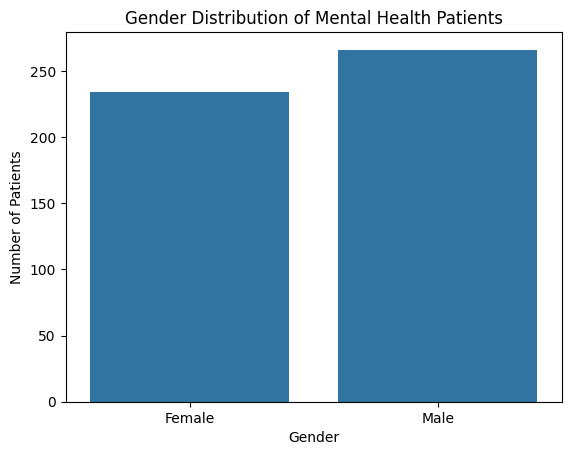

In [10]:
# Visualizing the results
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
gender_counts = {'Female': 234, 'Male': 266}

# Plot
sns.barplot(x=list(gender_counts.keys()), y=list(gender_counts.values()))
plt.title('Gender Distribution of Mental Health Patients')
plt.ylabel('Number of Patients')
plt.xlabel('Gender')
plt.show()


### Interpretation:
The dataset consists of 234 female and 266 male patients, indicating a slightly higher male representation in the mental health treatment records.

### Insight:
The nearly balanced gender distribution suggests that both males and females are seeking mental health treatment, which may indicate growing awareness and reduced stigma across genders.












### 2. Avg mood by therapy

In [11]:
# SQL query
query = '''
SELECT "Therapy Type", AVG("Mood Score (1-10)") AS avg_mood_score
FROM mental_health_data
GROUP BY "Therapy Type";
'''

therapy_mood_df = pd.read_sql(query, engine)
therapy_mood_df


,Therapy Type,avg_mood_score
0,Interpersonal Therapy,5.540323
1,Cognitive Behavioral Therapy,5.572650
2,Mindfulness-Based Therapy,5.292308
3,Dialectical Behavioral Therapy,5.534884


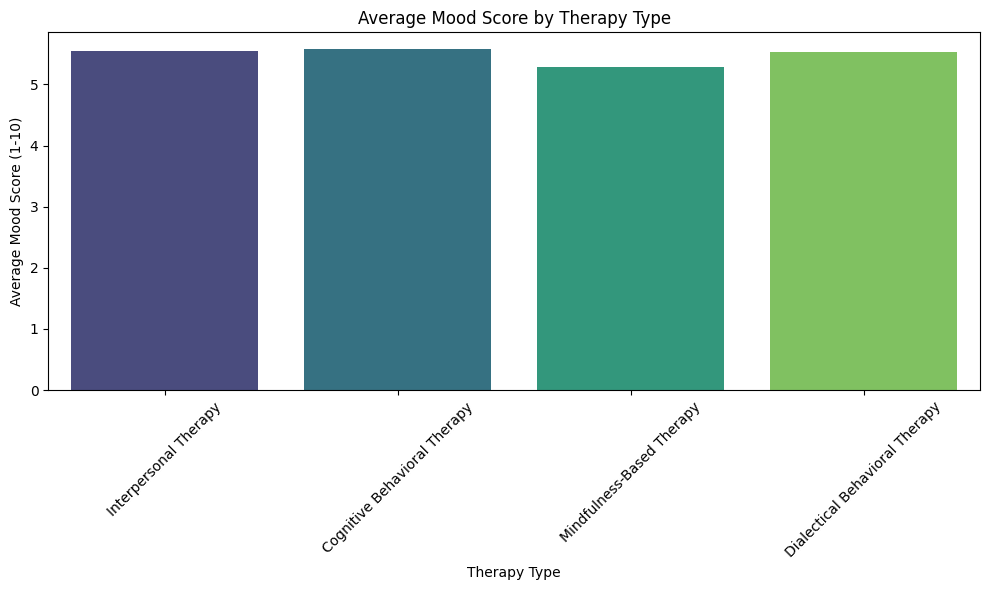

In [32]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    data=therapy_mood_df,
    x="Therapy Type",
    y="avg_mood_score",
    hue="Therapy Type",        # Assign hue
    palette="viridis",
    legend=False               # Avoid duplicate legend
)
plt.title("Average Mood Score by Therapy Type")
plt.xlabel("Therapy Type")
plt.ylabel("Average Mood Score (1-10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretation & Insight:
Cognitive Behavioral Therapy (CBT) appears to be associated with the highest average mood score (5.572650), suggesting it might be the most effective among the listed therapies for improving mood, while Mindfulness-Based Therapy has the lowest average mood score (5.292308).

### 3. Age Distribution

In [13]:
# SQL query
query = '''
SELECT MIN("Age") AS min_age, MAX("Age") AS max_age, AVG("Age") AS avg_age
FROM mental_health_data;
'''

age_stats_df = pd.read_sql(query, engine)
age_stats_df



,min_age,max_age,avg_age
0,18,60,38.708


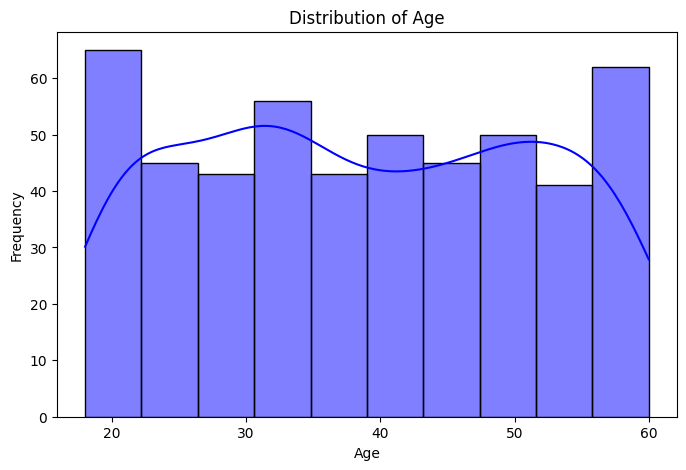

In [14]:
# Visualization
# Load the "Age" column from the database
age_query = 'SELECT "Age" FROM mental_health_data;'
age_df = pd.read_sql(age_query, engine)

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(age_df["Age"], bins=10, kde=True, color='blue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()


## Interpretation:
The graph shows that more people are in their early 20s and late 50s. These people are concerned more about therir mental health.

## Insight:
This data likely represents two different age groups, such as younger adults and older adults.This suggests that mental health treatment efforts might be more concentrated on or utilized by individuals in these specific age brackets

### 4. Outcome by diagnosis

In [15]:
# SQL query
query = '''
SELECT "Diagnosis", "Outcome", COUNT(*) AS count
FROM mental_health_data
GROUP BY "Diagnosis", "Outcome";
'''

diagnosis_outcome_df = pd.read_sql(query, engine)
diagnosis_outcome_df


,Diagnosis,Outcome,count
0,Bipolar Disorder,Deteriorated,46
1,Panic Disorder,Deteriorated,44
2,Generalized Anxiety,No Change,45
3,Major Depressive Disorder,Improved,32
4,Generalized Anxiety,Improved,53
5,Major Depressive Disorder,Deteriorated,44
6,Bipolar Disorder,Improved,44
7,Bipolar Disorder,No Change,34
8,Panic Disorder,Improved,41
9,Generalized Anxiety,Deteriorated,37


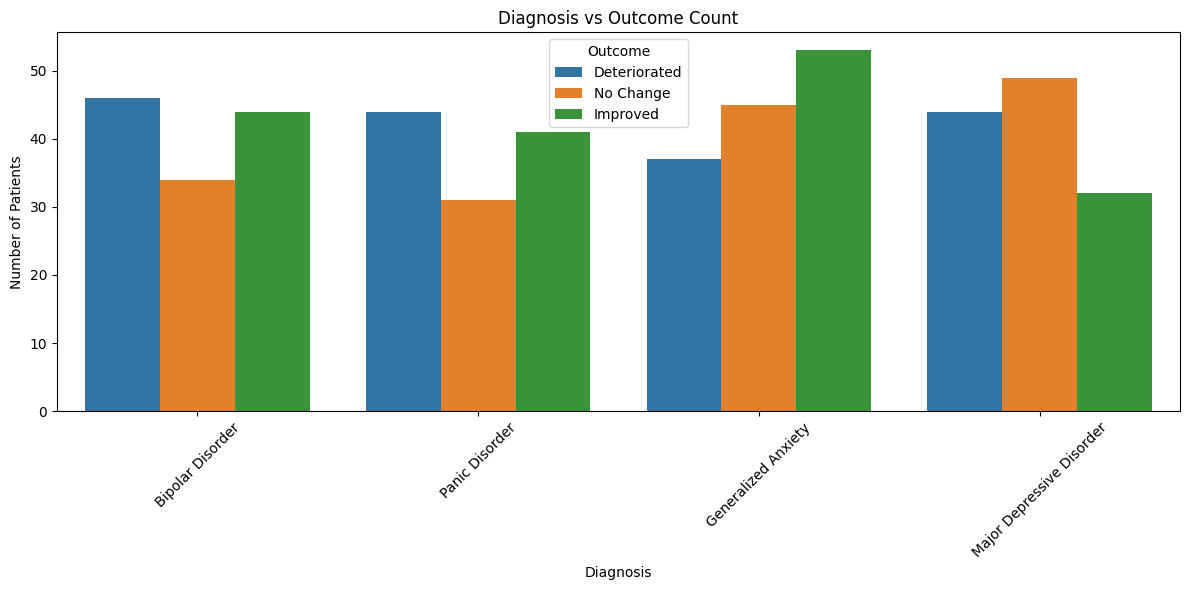

In [16]:
# Visualization

plt.figure(figsize=(12,6))
sns.barplot(data=diagnosis_outcome_df, x="Diagnosis", y="count", hue="Outcome")

plt.title("Diagnosis vs Outcome Count")
plt.xlabel("Diagnosis")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretation:
 table shows that Generalized Anxiety had the most improved cases (53), while Bipolar Disorder had the most deteriorated cases (46) among the conditions listed.

### Insight:
This suggests that the effectiveness of interventions varies considerably depending on the specific mental health diagnosis, with Generalised Anxiety showing more positive outcomes and Bipolar Disorder presenting greater treatment challenges in this dataset.

### 5.Sleep Quality vs Stress

In [17]:
# SQL Query in Colab
query = '''
SELECT "Sleep Quality (1-10)" AS sleep_quality,
       AVG("Stress Level (1-10)") AS avg_stress_level
FROM mental_health_data
GROUP BY "Sleep Quality (1-10)"
ORDER BY sleep_quality;
'''

sleep_stress_df = pd.read_sql(query, engine)
sleep_stress_df


,sleep_quality,avg_stress_level
0,4,7.600000
1,5,7.462500
2,6,7.357143
3,7,7.418605
4,8,7.871795
5,9,7.602564


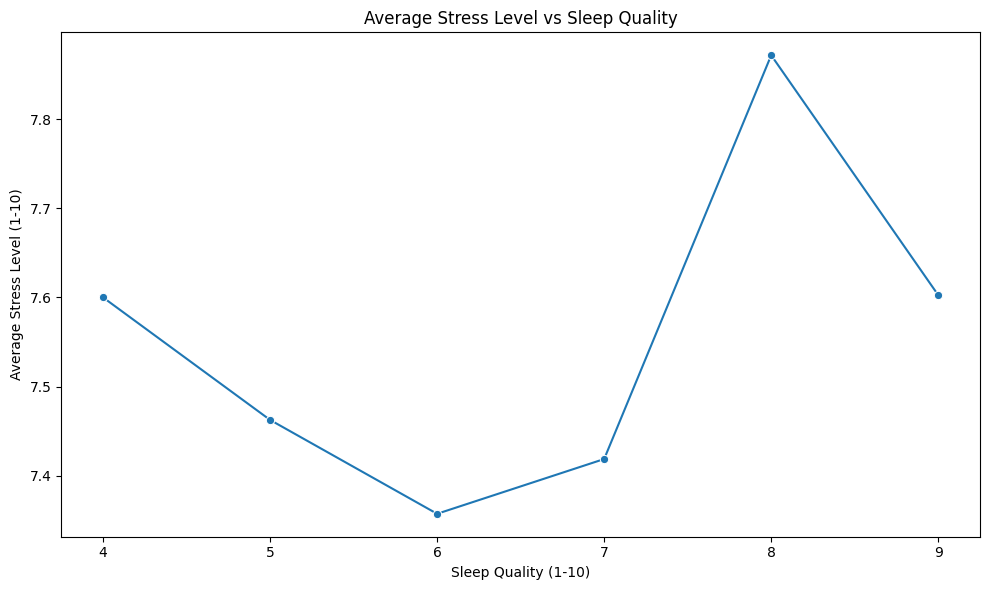

In [18]:
# Step 2: Visualization (Line Plot)

plt.figure(figsize=(10,6))
sns.lineplot(data=sleep_stress_df, x='sleep_quality', y='avg_stress_level', marker='o')

plt.title('Average Stress Level vs Sleep Quality')
plt.xlabel('Sleep Quality (1-10)')
plt.ylabel('Average Stress Level (1-10)')
plt.grid(False)
plt.tight_layout()
plt.show()


### Interpretation:
The table shows that as sleep quality generally increases from 4 to 9, the average stress level does not consistently decrease; it fluctuates, even increasing significantly at a sleep quality of 8.

### Insight:
There isn't a simple inverse relationship between sleep quality and stress level in this data; good sleep doesn't automatically mean lower stress, and other factors might be at play, especially for those with very good sleep (quality 8).

### 6. Progress by Therapy Type

In [19]:
# SQL Query in Colab
query = '''
SELECT "Therapy Type",
       AVG("Treatment Progress (1-10)") AS avg_treatment_progress
FROM mental_health_data
GROUP BY "Therapy Type"
ORDER BY avg_treatment_progress DESC;
'''

therapy_progress_df = pd.read_sql(query, engine)
therapy_progress_df



,Therapy Type,avg_treatment_progress
0,Interpersonal Therapy,7.524194
1,Dialectical Behavioral Therapy,7.457364
2,Cognitive Behavioral Therapy,7.427350
3,Mindfulness-Based Therapy,7.338462


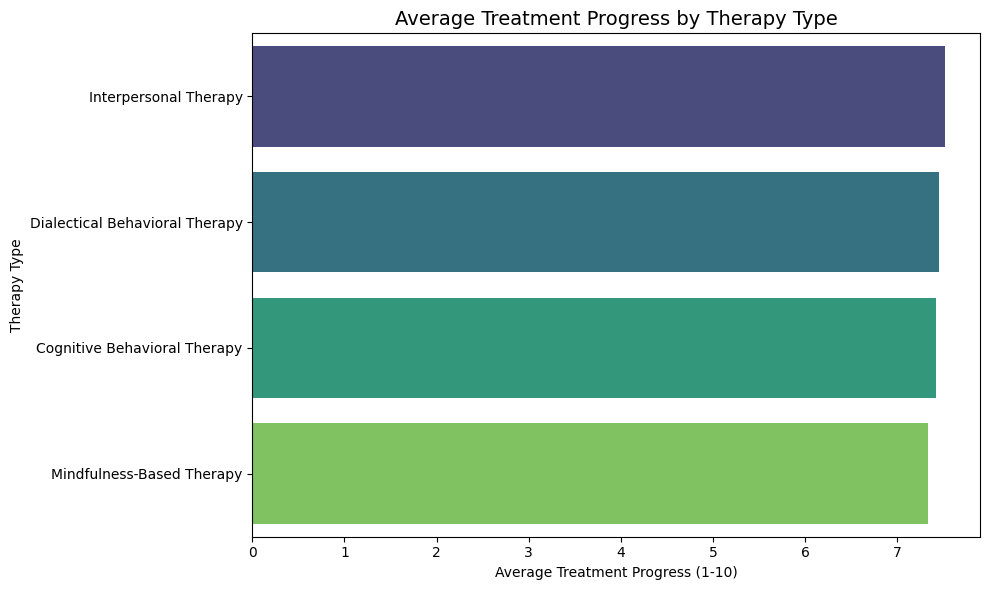

In [33]:
# Visualization (Bar Plot)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot with hue = y and legend disabled
sns.barplot(
    data=therapy_progress_df,
    x='avg_treatment_progress',
    y='Therapy Type',
    hue='Therapy Type',           # Set hue to y variable
    palette='viridis',
    legend=False                  # Disable duplicate legend
)

# Add titles and labels
plt.title('Average Treatment Progress by Therapy Type', fontsize=14)
plt.xlabel('Average Treatment Progress (1-10)')
plt.ylabel('Therapy Type')
plt.tight_layout()

# Show the plot
plt.show()




### Interpretation:
Interpersonal Therapy has the highest average treatment progress at 7.52, while Mindfulness-Based Therapy has the lowest at 7.34.

### Insight:
Interpersonal Therapy appears to be the most effective among the listed therapies for achieving treatment progress in this data.

### 7. Top 5 Most Common Diagnoses

In [22]:
# SQL Query to get Top 5 Most Common Diagnoses
query = '''
SELECT "Diagnosis", COUNT(*) AS total_patients
FROM mental_health_data
GROUP BY "Diagnosis"
ORDER BY total_patients DESC
LIMIT 5;
'''

# Execute query and load into DataFrame
top_diagnoses_df = pd.read_sql(query, engine)
top_diagnoses_df


,Diagnosis,total_patients
0,Generalized Anxiety,135
1,Major Depressive Disorder,125
2,Bipolar Disorder,124
3,Panic Disorder,116


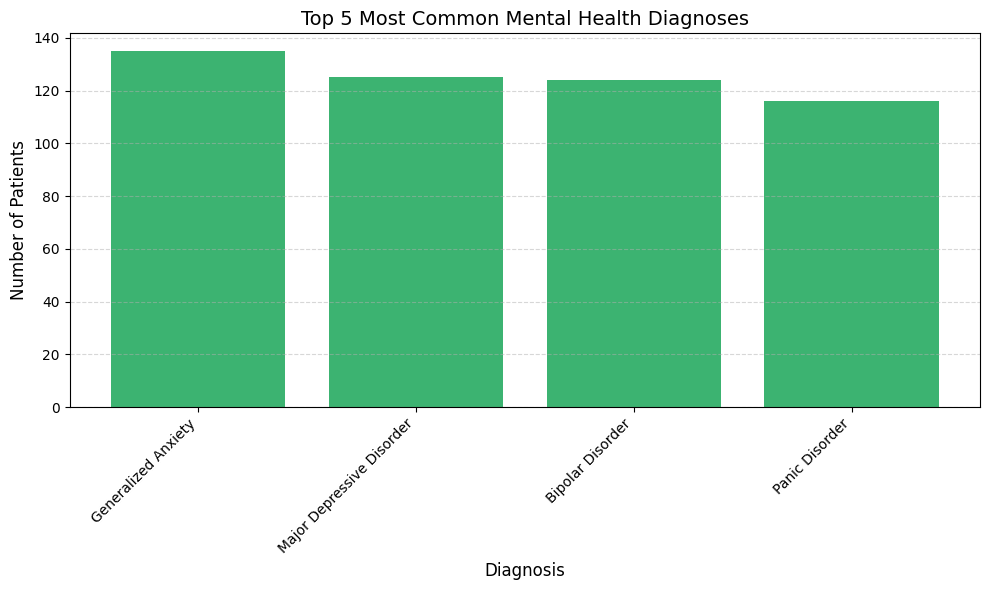

In [23]:
# Visualization Code (Bar Plot):


plt.figure(figsize=(10,6))
plt.bar(top_diagnoses_df["Diagnosis"], top_diagnoses_df["total_patients"], color='mediumseagreen')
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title('Top 5 Most Common Mental Health Diagnoses', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Interpretation:
Generalized Anxiety has the highest number of total patients at 135, while Panic Disorder has the lowest at 116.

### Insight:
 Generalized Anxiety is the most prevalent diagnosis in this dataset, indicating it affects the largest portion of the patient population.

### 8. Average Stress Level by Gender

In [24]:
# SQL Query to get average stress level by Gender
query = '''
SELECT "Gender", AVG("Stress Level (1-10)") AS avg_stress
FROM mental_health_data
GROUP BY "Gender";
'''

# Load result into a DataFrame
gender_stress_df = pd.read_sql(query, engine)
gender_stress_df


,Gender,avg_stress
0,Female,7.576923
1,Male,7.511278


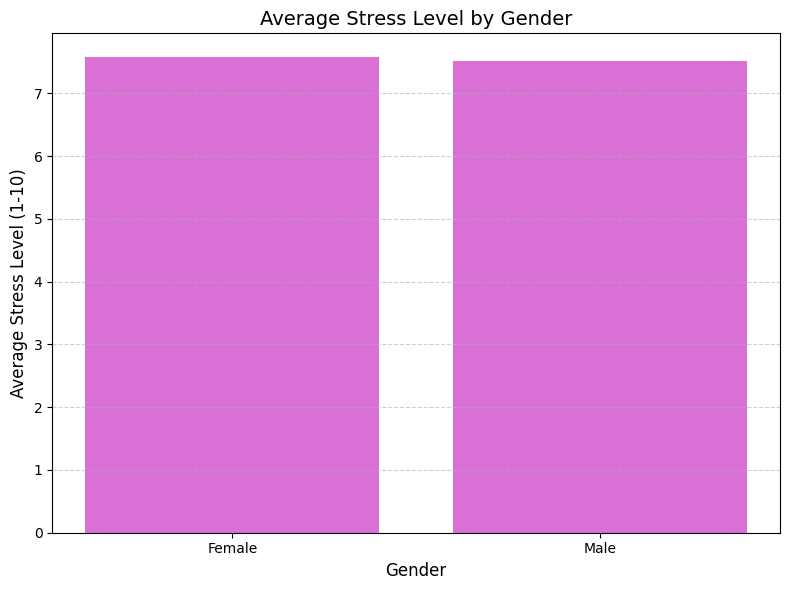

In [25]:
#  Visualization Code (Bar Plot)
# Plotting average stress levels by gender
plt.figure(figsize=(8,6))
plt.bar(gender_stress_df["Gender"], gender_stress_df["avg_stress"], color='orchid')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Stress Level (1-10)', fontsize=12)
plt.title('Average Stress Level by Gender', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Interpretation:
Female individuals have a slightly higher average stress level (7.576923) compared to male individuals (7.511278).

### Insight:
While both genders experience high average stress, females in this dataset report marginally higher stress levels than males.

### 9. Progress vs. Diagnosis

In [26]:
# Run the SQL query
query = '''
SELECT "Diagnosis", AVG("Treatment Progress (1-10)") AS avg_progress
FROM mental_health_data
GROUP BY "Diagnosis"
ORDER BY avg_progress DESC;
'''

# Execute and load the result into a DataFrame
diagnosis_progress_df = pd.read_sql(query, engine)

# Display the DataFrame
diagnosis_progress_df


,Diagnosis,avg_progress
0,Panic Disorder,7.637931
1,Major Depressive Disorder,7.552000
2,Generalized Anxiety,7.355556
3,Bipolar Disorder,7.217742


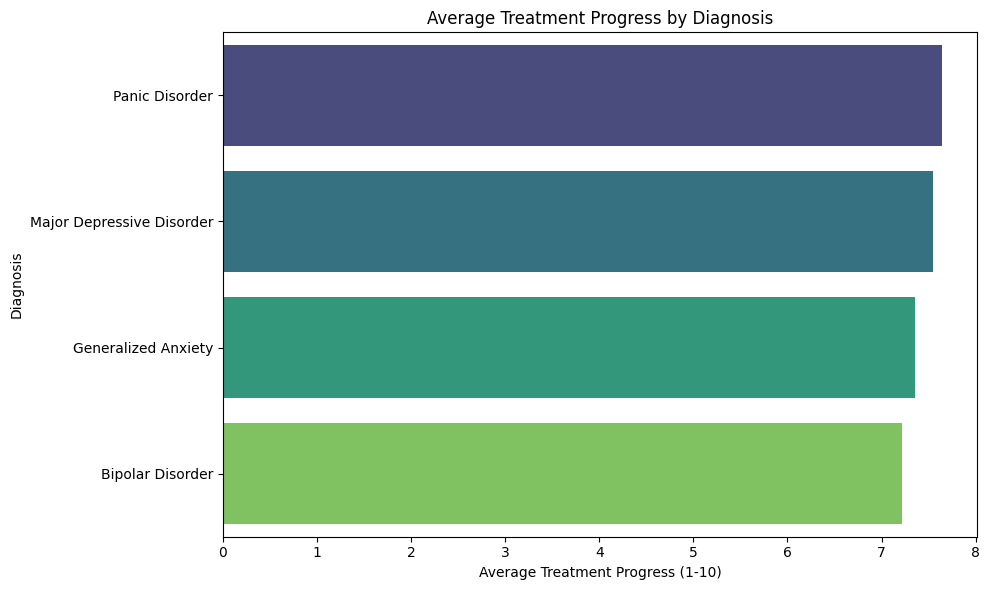

In [28]:
# Visualization Code (Bar Plot)
# Set plot size and style
plt.figure(figsize=(10, 6))

# Use 'Diagnosis' as hue (even if it doesn't affect grouping visually) to assign colors via palette
sns.barplot(
    data=diagnosis_progress_df,
    x="avg_progress",
    y="Diagnosis",
    hue="Diagnosis",             # added hue
    palette="viridis",
    dodge=False,                 # ensures bars are not offset
    legend=False                 # hides the legend
)

# Add labels and title
plt.xlabel("Average Treatment Progress (1-10)")
plt.ylabel("Diagnosis")
plt.title("Average Treatment Progress by Diagnosis")

# Show plot
plt.tight_layout()
plt.show()


### Interpretation:
Panic Disorder shows the highest average progress at 7.63, while Bipolar Disorder shows the lowest at 7.21.

### Insight:
Patients with Panic Disorder seem to experience the most positive average progress, whereas those with Bipolar Disorder show the least average progress in this dataset.

### 10. Stress Level vs. Mood Score

In [29]:
# SQL query
query = '''
SELECT "Mood Score (1-10)", AVG("Stress Level (1-10)") AS avg_stress
FROM mental_health_data
GROUP BY "Mood Score (1-10)"
ORDER BY "Mood Score (1-10)";
'''

mood_stress_df = pd.read_sql(query, engine)
mood_stress_df


,Mood Score (1-10),avg_stress
0,3,7.732558
1,4,7.551282
2,5,7.696629
3,6,7.397727
4,7,7.662162
5,8,7.223529


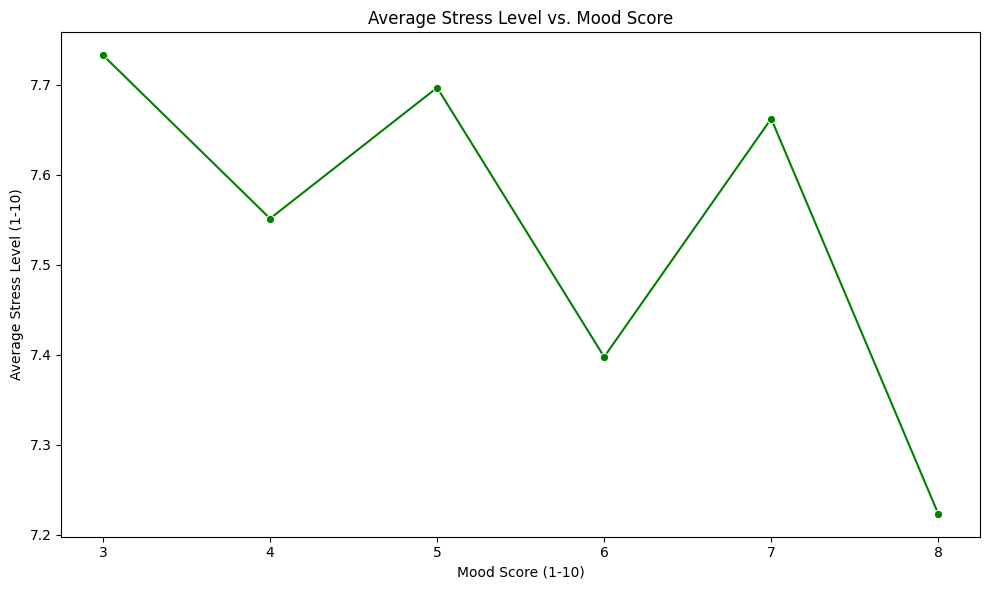

In [31]:
# Visualization(Line Plot)
plt.figure(figsize=(10, 6))
sns.lineplot(data=mood_stress_df,
             x="Mood Score (1-10)", y="avg_stress", marker='o', color='green')

plt.title("Average Stress Level vs. Mood Score")
plt.xlabel("Mood Score (1-10)")
plt.ylabel("Average Stress Level (1-10)")
plt.grid(False)
plt.tight_layout()
plt.show()


### Interpretation:
The table shows fluctuating average stress levels across different mood scores, with no clear linear trend of decreasing stress as mood score increases.

### Insight:
Higher mood scores don't consistently correlate with lower average stress levels in this data, suggesting a complex relationship or influence from other factors.

## Key Takeaways:
### Balanced Gender Participation
The nearly equal participation of males and females suggests reduced stigma and increased awareness around mental health issues across genders.

### Effectiveness of Therapies

Cognitive Behavioral Therapy (CBT) stands out with the highest mood improvement, indicating its effectiveness in emotional well-being.

Interpersonal Therapy demonstrates the most treatment progress, making it a promising option for long-term recovery strategies.

### Diagnosis-Specific Outcomes

Generalized Anxiety not only emerges as the most common diagnosis but also shows relatively better treatment outcomes.

Bipolar Disorder poses the greatest treatment challenges, indicating the need for more targeted interventions.

### Stress, Mood & Sleep Complexity

No direct relationship was found between sleep quality and stress, suggesting other influencing factors such as life events or co-morbidities.

Higher mood scores don't always imply lower stress levels, pointing to the complexity of emotional health.

### Age Group Trends
The age distribution shows a bimodal pattern, indicating treatment concentration among young adults and older adults, perhaps due to increased vulnerability or help-seeking behavior in those groups.

### Gender & Stress Levels
While both genders report high stress, females show marginally higher levels, highlighting the need for gender-sensitive mental health approaches.

## Final Conclusion:
This project provides an in-depth exploratory analysis of a mental health dataset using SQL for data querying and Python (Pandas, Seaborn, Matplotlib) for data visualization and insight generation. The study uncovers key patterns across gender, therapy types, stress and mood levels, age distributions, and diagnostic outcomes, offering valuable real-world implications for mental health treatment strategies.

